In [7]:
import sys
sys.path.append('/home/xiaoxinyu/TorchFiber')
from src.NewSimulation.config import *

## 1.one gaussian pulse

In [3]:
# gaussian analysis form
def g(z,t):
    tau = 1
    beta2 = 1
    return np.sqrt((tau**2)/(tau**2-(beta2*z)*(1j)))*np.exp(-t**2/2*(1/(tau**2-beta2*z*(1j))))

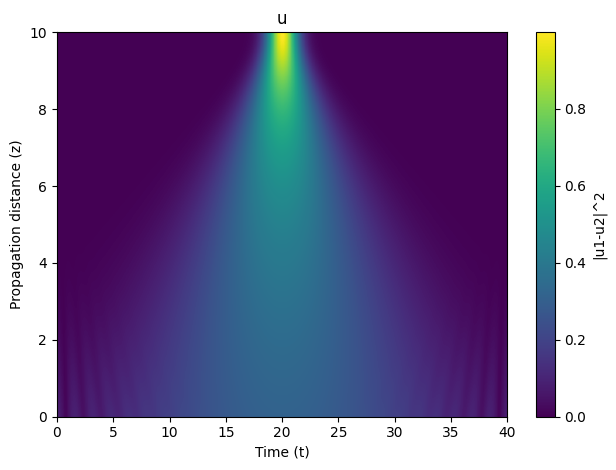

<Figure size 640x480 with 0 Axes>

In [2]:
z_max = 10      # Maximum value of z.  use Ld as unit.
t_max = 40      # Range of t from 0 to t_max.   use symbol time as unit.  (so we have t_max symbols here)
sps = 8         # Samples per symbol
Nt = sps*t_max  # Number of steps in t
Nz = 1000       # Number of steps in z
dz = z_max / Nz
dt = t_max / Nt

# initial condition
t = np.linspace(-t_max/2, t_max/2, Nt)
u0 = np.exp(-0.5*t**2)

u = SSFM(u0, dt, dz, z_max, gamma=0, order=2)


plt.imshow(np.abs(u), extent=[0, t_max, 0, z_max], aspect='auto')
# plt.imshow(np.angle(u1), extent=[-t_max, t_max, 0, z_max], aspect='auto')
plt.colorbar(label='|u1-u2|^2')
plt.xlabel('Time (t)')
plt.ylabel('Propagation distance (z)')
plt.title('u')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

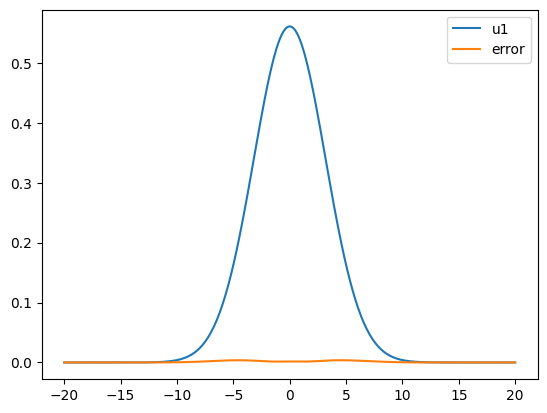

In [4]:
z = 3
u1 = SSFM(u0, dt, dz, z, gamma=0, order=2, path=False)
plt.plot(t, np.abs(u1), label='u1')
plt.plot(t, np.abs(g(z, t) - u1), label='error')
plt.legend()

In [ ]:
from matplotlib import animation
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    plt.ylim(0, 1)
    ax.plot(t, np.abs(u[10*i])**2, label=f"Step {i}")
    ax.set_xlabel("Position")
    ax.set_ylabel("Probability Density")
    ax.legend()
    return ax

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)
# anim.save('../outputs/gifs/one_gaussion.gif', writer='imagemagick')

# 2.Two-pulse

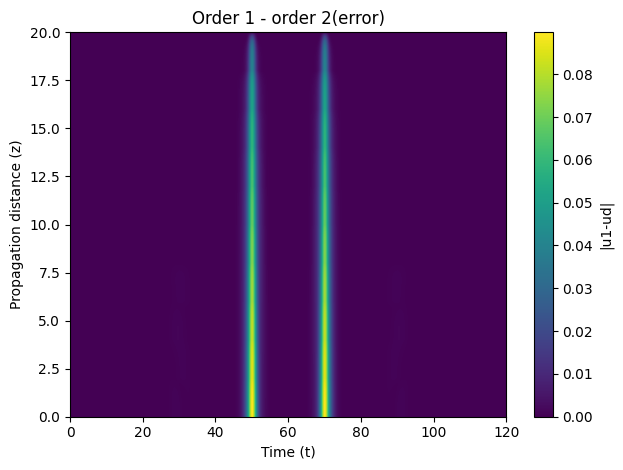

<Figure size 640x480 with 0 Axes>

In [5]:
z_max = 20      # Maximum value of z.  use Ld as unit.
t_max = 120      # Range of t from 0 to t_max.   use symbol time as unit.  (so we have t_max symbols here)
sps = 8         # Samples per symbol
Nt = sps*t_max  # Number of steps in t
Nz = 1000       # Number of steps in z
dz = z_max / Nz
dt = t_max / Nt
A0 = 1

# initial condition
t = np.linspace(-t_max/2, t_max/2, Nt)
# u0 = A0*np.sinc(-0.5*(t-5)**2) + A0*np.sinc(-0.5*(t-10)**2) + A0*np.sinc(-0.5*(t+5)**2)
# u0 = A0*np.exp(-0.5*(t-5)**2) + A0*np.exp(-0.5*(t-10)**2) + A0*np.exp(-0.5*(t+5)**2)
u0 = A0*np.exp(-0.5*(t+10)**2) + A0*np.exp(-0.5*(t-10)**2) 

u = SSFM(u0, dt, dz, z_max, gamma, order=2)
ud = SSFM(u0, dt, dz, z_max, 0, order=2)

u1 = (u - ud)

u_delta = np.zeros_like(u1)
for i,u_ in enumerate(u1):
    if i==0:continue
    u_delta[i] = Dispersion(u_, dt,  -i*dz)


plt.imshow(np.abs(u_delta), extent=[0, t_max, 0, z_max], aspect='auto')
# plt.imshow(np.angle(u1), extent=[-t_max, t_max, 0, z_max], aspect='auto')
plt.colorbar(label='|u1-ud|')
plt.xlabel('Time (t)')
plt.ylabel('Propagation distance (z)')
plt.title('Order 1 - order 2(error)')
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

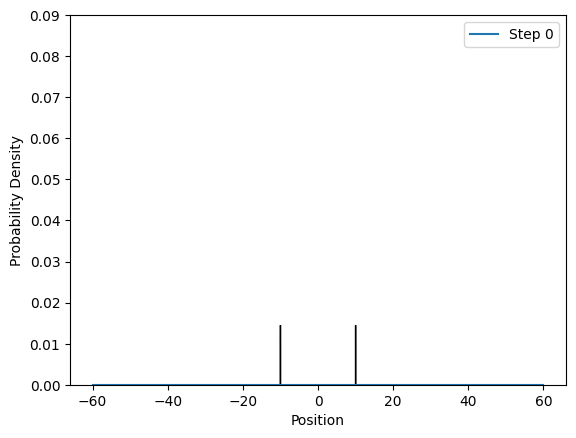

In [6]:
from matplotlib import animation
fig, ax = plt.subplots()

def animate(i):
    ax.clear()
    plt.ylim(0, 0.09)
    ax.plot(t, np.abs(u_delta[10*i]), label=f"Step {i}")
    plt.arrow(10,0, 0, 0.01)
    plt.arrow(-10,0, 0, 0.01)
    ax.set_xlabel("Position")
    ax.set_ylabel("Probability Density")
    ax.legend()
    return ax

anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)
anim.save('../outputs/gifs/three_gaussian.gif', writer='imagemagick')